# Intro to Python


### Topics

- What is Python (how is it different than e.g. C++)
- Why you should (or shouldn't) use Python
- How Python is intended to be used or how to mitigate the cons, while using the pros
- Useful tools
    - Librairies
    - Iterator design
    - Data structures
    - OOP design

### What is the point, why are we coding?

Mostly, we want to do good physics as quick and easily as possible. 
What are our use cases?
- Data analysis: download data, parse data, look at data, plot data, use librairies to analyse data
- Higher level software development: creating algorithms and tools to use on data, developing ML pipelines, developing higher level content within collaboration software 
- But really: doing quick and dirty checks, being able to rapidly load data, rapidly display and format plots, etc.

### So why Python?

Python is an interpreted (or interactive) language. What this mean to you is that as far as you are concerned, Python is ***not*** compiled and just runs magically. You type something and it just happens, fantastic!

![alt text](images/interpreter_vs_compiler.jpg "Title")

Now obviously there are a lot of caviats with this sentence:
- Languages can typically be both interpreted and compiled. You **can** compile your python code!
- Even interpreted languages will usually be compiled for later use. If you run your python code twice, it will (usually) run much faster.
- Ultimately, all languages have to be compiled to machine code. It just depends *how* you do it.

What does it matter if it is compiled or interpreted?
- Compiled: 
    - Whole source code is taken as a block and compiled into machine code at once.
    - Will usually require more structure and explicit instructions for the compiler.
    - Allows for more efficient usage of ressources, memory allocation and planning. Once compiled, it runs **fast**.
    - Compiling can often take a long time too!

- Interpreted:
    - One line at a time, the code is parsed, compiled & ran.
    - Once it is ran, the interpreter remembers and can run it faster!
    - Poor planning due to "line by line" nature. Usually pretty **slow**.
    - Very easy to debug, and perfect for interactive usage with data.

![alt text](images/compiling_xkcd.png "Title")

### Dual language design

Because Python is so slow, the heavy lifting is often done using compiled languages such as C or Fortran. The dual language design is to use Python to run a backend written in C/C++/Fortran. This is what a lot of Physics collaboration do, and you can too!

I will go over in more details how this can/should be used later in this notebook.


### Let's set it up:

You can download these notes from github at: https://github.com/YellowCranberry/Software-Plumbing-Python-2022  
* Click "Code" and then clone it, or "Download ZIP".
* The repository contains this Python Notebook (intro.ipynb), as well as a requirement.txt with the librairies you will need.


You can get a Python notebook IDE of your choice:
- Jupyter notebook through Anaconda at: https://www.anaconda.com/products/distribution#windows 
- Visual studio at: https://code.visualstudio.com/download
    - You can install the extension for Python and Jupyter Notebook from the left panel.


In [19]:
# Let's install the required librairies for this demo
%pip install -U -r ./requirements.txt
#conda install --file requirements.txt

You should consider upgrading via the 'c:\Users\Alexandre\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Variable Declaration & Mathematical Expressions

In [20]:
a = 1
b = 3.0
c = 2*a + b/a # multiplication and division
d = c**b # exponentiation
e, f = b%a, d//c # modulus and floor division 

No type declaration. Python variables are "names" that point to objects that have a type. Therefore, they are not reference type!

So what are the types of these variables?

In [21]:
print(f'The type of a, {a}, is: {type(a)}.')
print(f'The type of b, {b}, is: {type(b)}.')
print(f'The type of c, {c}, is: {type(c)}.')

The type of a, 1, is: <class 'int'>.
The type of b, 3.0, is: <class 'float'>.
The type of c, 5.0, is: <class 'float'>.


### Strings and Printing

In [22]:
normal_string = "A normal string"
print(normal_string)

f_string = f"An f string with variable input: c = {c}"
print(f_string)

print(f"An f string with special format: d = {d:.2f}." \
    + f' You can add strings together to concatenate and even do math in here! {e} + {f} = {e + f}')

A normal string
An f string with variable input: c = 5.0
An f string with special format: d = 125.00. You can add strings together to concatenate and even do math in here! 0.0 + 25.0 = 25.0


### Arrays, List

Arrays are very important in Python. So called "Pythonic" code relies heavily on array-like operations to optimize speed!

In [23]:
import numpy

my_list = [1, 2, 3] # lists are native to Python
my_array = numpy.array(my_list) # arrays are numpy objects
my_2dlist = [ [1, 2, 3],
                [4, 5, 6]]

print(f'print the list: {my_list}', f', print the array:{my_array}')
print(f'print the 2dlist: {my_2dlist}')

# list can contain more than one type!
multi_type_list = [1, 3.5, "potato"]
print(f'print the multi type list: {multi_type_list}')

print the list: [1, 2, 3] , print the array:[1 2 3]
print the 2dlist: [[1, 2, 3], [4, 5, 6]]
print the multi type list: [1, 3.5, 'potato']


### Function Declaration

As you will notice, "my_addition" does not have a specified input or return type. You can use it with any type you want! It will by default use the overiden operator for that variable type.

Functions also don't have to return anything; they can be used to print or modify objects. You should always use a self-contained function when performing an action. 

In [24]:
def my_addition(x, y=1):
    return x + y

print(f'Addition of {a} and {b} is: {my_addition(a, b)}')
print(f'Addition of {a} and nothing is: {my_addition(a)}')

Addition of 1 and 3.0 is: 4.0
Addition of 1 and nothing is: 2


In [25]:
s1 = "Hello "
s2 = "World!"
print(f'Addition of {s1} and {s2} is: {my_addition(s1,s2)}')

arr1 = [1,2,3]
arr2 = [4,5,6] 
print(f'Addition of {arr1} and {arr2} is: {my_addition(arr1,arr2)}')

Addition of Hello  and World! is: Hello World!
Addition of [1, 2, 3] and [4, 5, 6] is: [1, 2, 3, 4, 5, 6]


If this flexibility bothers you, you can *hint* at what type should be used in your function (note that this is not enforced!). Python is however designed not to discriminate based on type, so don't force it unless you really need too.

In [26]:
def my_int_addition(x : int, y : int) -> int:
    return x + y

my_int_addition(s1, s2) # try replacing the function parameters to see the hinted types

'Hello World!'

### Loop and Standard Logical Operations

Python is **very** slow with normal loop architecture (again, low efficiency in run time allocation of ressources).

In [27]:
# standard for-loop structure, Python uses iterators!
for item in multi_type_list:
    print(item)
print(" ")

# you can also get the index through enumerators
for index, item in enumerate(multi_type_list):
    print(f'{index}: {item}')
print(" ")

# you can get multiple lists at the same time by zipping them
for item1, item2 in zip(arr1, arr2):
    print(item1, item2)
print(" ")

# other loops & if statements
my_bool = True
counter = 0
while(my_bool):
    if(counter > 3 and (counter != 0 or counter == 2)):
        my_bool = False 
    print(counter)
    counter += 1

1
3.5
potato
 
0: 1
1: 3.5
2: potato
 
1 4
2 5
3 6
 
0
1
2
3
4


### However, because Python has slow loops, we use array operations to be **faster**!

In [28]:
import timeit

#summing array length 500 with numpy array operations
import_module = "import numpy as np"

testcode = '''
np.sum(np.arange(500))
'''
print(timeit.timeit(stmt=testcode, setup=import_module))

#summing array length 500 with native python loops 
import_module = "import numpy as np"

testcode = '''
total = 0
for i in np.arange(500):
    total += i
'''
print(timeit.timeit(stmt=testcode, setup=import_module))

24.666851199999655
105.22889360000045


#### If there is a package for it, **always** use it! Most of your calculations have premade librairy implementations: sum, mean, std, ... 

If your function is more complicated, using  maps or list comprehensions is good! It will usually be slightly faster (e.g. map has some C backend).

In [29]:
import numpy as np

long_array = np.arange(500)

#find which numbers modulo 5
def modulo(n):
    if n%5 == 0:
        return True
    else:
        return False

new_list = []
for i in long_array:
    new_list.append(modulo(i))
    
modified_list_map = list(map(modulo, long_array)) # map your function unto the array, and make a list out of it
#print(modified_array)

modified_list_comprehension = [True if n%5 == 0 else False for n in long_array] # use array comprehension 
#print(modified_list_comprehension)

## Plotting with functions and maps

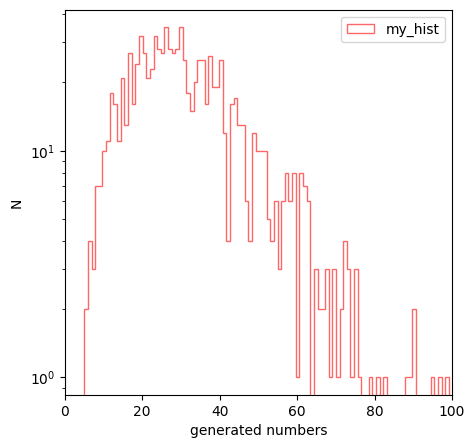

In [30]:
import matplotlib.pyplot as plt

size, scale = 1000, 10
generated_numbers = np.array(np.random.gamma(scale, size=size) ** 1.5)

def my_plotting_script(kwargs, other):
    plt.figure(figsize=(5,5))
    plt.hist(generated_numbers, **kwargs, **other)
    plt.legend()
    plt.xlim(0,100)
    plt.yscale('log')
    plt.xlabel('generated numbers')
    plt.ylabel('N')

kwargs = {
            'color':'red',
            'alpha':0.6
            }

other = {
            'label':'my_hist',
            'bins':90,
            'histtype':'step',
}

my_plotting_script(kwargs, other)

## Pandas

Pandas is a **very** fast library that allows you to manipulate large amount of data in Python.

In [31]:
import pandas as pd

# creating a pandas dataframe
# you can read csv files using: df = pd.read_csv(r'Path where the CSV file is stored\File name.csv') 

n = 1000
a_bar = 5; a_sd = 1
b_bar = 15; b_sd = 1
df = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=n),
                       b=np.random.normal(b_bar, b_sd, size=n)),
                  columns=['a', 'b'])

df

,a,b
0,6.392091,14.568002
1,4.216446,13.854982
2,5.957205,14.354694
3,3.874541,14.902516
4,5.016284,15.696572
...,...,...
995,4.240912,16.111621
996,4.383725,15.603610
997,6.262159,14.195706
998,4.845751,14.899943


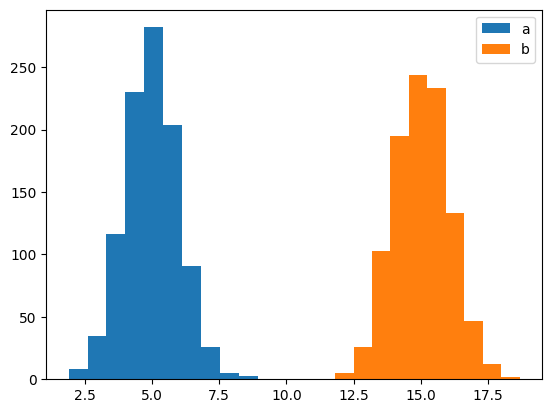

In [32]:
# Plotting our pandas dataframe
plt.hist(df['a'], label='a')
plt.hist(df['b'], label='b')
plt.legend()
plt.show()


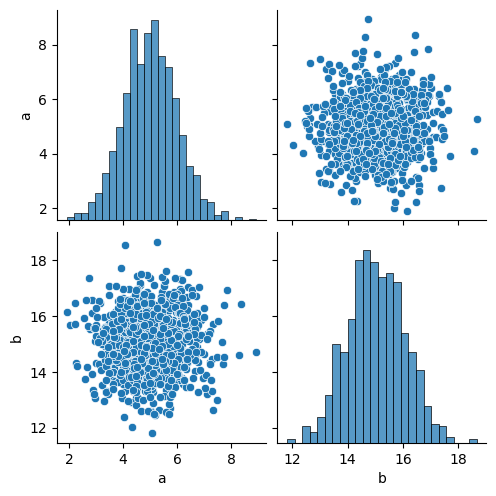

In [33]:
# plotting data relation using seaborn
import seaborn as sns

sns.pairplot(df)

For more complicated operations on the dataframe, use mask with logical conditions

0      False
1       True
2       True
3      False
4       True
       ...  
995     True
996     True
997    False
998     True
999    False
Name: a, Length: 1000, dtype: bool


(array([[534., 163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  13., 149., 375., 150.,  10.]]),
 array([ 3.99196613,  5.45928708,  6.92660803,  8.39392897,  9.86124992,
        11.32857086, 12.79589181, 14.26321276, 15.7305337 , 17.19785465,
        18.66517559]),
 <a list of 2 BarContainer objects>)

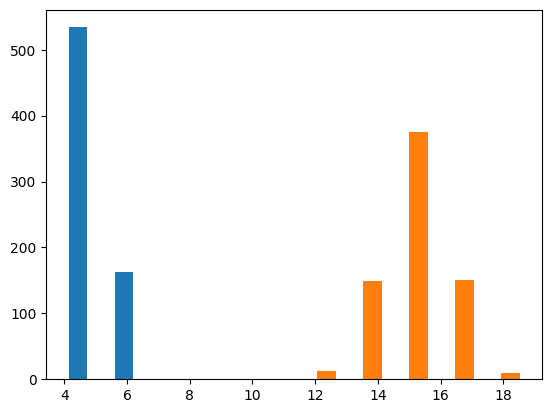

In [38]:
# use masks to manipulate data
mask = (df['a'] < df['a'].mean() + 1) & (df['a'] > df['a'].mean() - 1) # here you need to use the tranditional logical operators & (and), | (or)
print(mask)

df_modified_b = df[mask]
plt.hist(df_modified_b)

### Object Oriented Programming (OOP) in Python 

In [35]:
# Our class will define things that relate to cubes 
class Cube:
    length = 2

    def volume(self):
        return self.length**3

my_cube = Cube()
print(f'The volume of my cube is : {my_cube.volume()}')

The volume of my cube is : 8


this is an object that contains a shape and its vertices
vertex #0 is located at 1, 1, 0
vertex #1 is located at 1, 0, 1
vertex #2 is located at 0, 1, 1
vertex #3 is located at 0, 0, 0


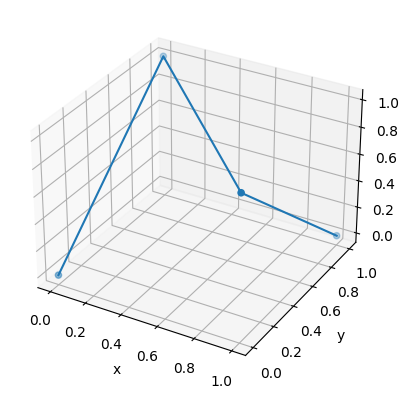

In [39]:
# A more involved class...
from dataclasses import dataclass

@dataclass
class Vertices:
    x: float
    y: float
    z: float

    def func(self):
        return 0

class Shape:
    def __init__(self, list_vertices):
        self.n_vertices = len(list_vertices)
        self.vertices = self.define_vertices(list_vertices) 

    def __str__(self) -> str:
        return "this is an object that contains a shape and its vertices"

    def define_vertices(self, list_vertices):
        list_object = [Vertices(*i) for i in list_vertices] 
        return list_object

    def print_vertex(self):
        for index, vertex in enumerate(self.vertices):
            print(f'vertex #{index} is located at {vertex.x}, {vertex.y}, {vertex.z}')

    def display_vertices(self):
        ax = plt.axes(projection='3d')
        xdata = [i.x for i in self.vertices]
        ydata = [i.y for i in self.vertices]
        zdata = [i.z for i in self.vertices]

        ax.scatter3D(xdata, ydata, zdata)
        ax.plot3D(xdata,ydata,zdata)

        ax.set_xlabel('x')
        ax.set_ylabel('y')


my_shape = Shape([[1,1,0],[1,0,1],[0,1,1], [0,0,0]])  
print(my_shape)
my_shape.print_vertex()
my_shape.display_vertices()


In [42]:
my_ver = Vertices(1,2,3)
my_ver.func()

0

In [ ]:
bool_elec = True
def func1(variables, my_dic):
    output = my_dic[id] #id will contain 11, 13, 

my_dic = {
        11:'this is an elec',
        13:'this is mu',
        311:'pion'
}